# Kerasを用いた画像分類入門（２）

##  過学習の抑制

## Google Colab用の設定

Google Colaboratory で実行する場合には下記のセルを実行してください。

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip /content/gdrive/My\ Drive/GD_share01/noodles.zip -d /content

Archive:  /content/gdrive/My Drive/GD_share01/noodles.zip
replace /content/noodles/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/__MACOSX/noodles/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/__MACOSX/noodles/._.DS_Store  
 extracting: /content/noodles/validaiton/Icon  
  inflating: /content/__MACOSX/noodles/validaiton/._Icon  
 extracting: /content/noodles/validaiton/udon/Icon  
  inflating: /content/__MACOSX/noodles/validaiton/udon/._Icon  
  inflating: /content/noodles/validaiton/udon/06078751ab342a44bedc08e235d5ef5c.jpg  
  inflating: /content/noodles/validaiton/udon/9bc003c9f8f02ac50457632ae16a53c0.jpg  
  inflating: /content/noodles/validaiton/udon/4bdc23f3086ffee25dd3bb067b964f91.jpg  
  inflating: /content/noodles/validaiton/udon/904fa4de320429df7262444ff12bc51f.jpg  
  inflating: /content/noodles/validaiton/udon/694ee8c6be241752a295d5d41cfb679b.jpg  
  inflating: /content/noodles/validaiton/udon/daf90a50bbc4395f42fe7a5248014ae

## ライブラリのインポート

In [0]:
import tensorflow.keras as keras

## 画像データの準備

 解凍した教師画像からデータを読み込むImageDataGeneratorを作成します。

In [0]:
train_dir = './noodles/train/'
validation_dir = './noodles/validaiton/'
test_dir = './noodles/test/'
image_size = (128, 128)
batch_size = 32
steps_per_epoch = 300 // batch_size
validation_steps = 100 // batch_size
test_steps = 100 // batch_size

image_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

train_generator = image_data_generator.flow_from_directory(train_dir,
                                                           target_size=image_size, 
                                                           batch_size=batch_size)
validation_generator = image_data_generator.flow_from_directory(validation_dir,
                                                                target_size=image_size, 
                                                                batch_size=batch_size)
test_generator = image_data_generator.flow_from_directory(test_dir,
                                                                target_size=image_size, 
                                                                batch_size=batch_size)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## ニューラルネットワークの過学習とは？

###  モデルの構築

Conv2DとMaxPooling2Dを用いた画像の２値分類のための畳み込みニューラルネットワークを構成します。

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))


### モデル構造の表示

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
__________

### モデルのコンパイル

モデルをコンパイルします。

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

### モデルの訓練

ここでは30エポック、モデルの訓練を行います。

In [0]:
history = model.fit_generator(train_generator,
                             epochs=30,
                             steps_per_epoch=steps_per_epoch,
                             validation_data=validation_generator,
                             validation_steps=validation_steps)

Epoch 1/30
8/9 [=========================>....] - ETA: 1s - loss: 0.8275 - acc: 0.5195

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


9/9 [==============================] - 19s 2s/step - loss: 0.8121 - acc: 0.5278 - val_loss: 0.6937 - val_acc: 0.4688
Epoch 2/30
9/9 [==============================] - 12s 1s/step - loss: 0.6916 - acc: 0.5268 - val_loss: 0.6841 - val_acc: 0.5312
Epoch 3/30
9/9 [==============================] - 17s 2s/step - loss: 0.6686 - acc: 0.5938 - val_loss: 0.6463 - val_acc: 0.6979
Epoch 4/30
9/9 [==============================] - 13s 1s/step - loss: 0.6121 - acc: 0.6863 - val_loss: 0.5733 - val_acc: 0.7083
Epoch 5/30
9/9 [==============================] - 16s 2s/step - loss: 0.6218 - acc: 0.6539 - val_loss: 0.6082 - val_acc: 0.6042
Epoch 6/30
9/9 [==============================] - 13s 1s/step - loss: 0.5715 - acc: 0.7014 - val_loss: 0.5704 - val_acc: 0.7396
Epoch 7/30
9/9 [==============================] - 13s 1s/step - loss: 0.4929 - acc: 0.7542 - val_loss: 0.4940 - val_acc: 0.7083
Epoch 8/30
9/9 [==============================] - 14s 2s/step - loss: 0.5057 - acc: 0.7569 - val_loss: 0.5079 - val

### 学習経過のグラフ化

下記のプログラムで、エポックごとの損失と正解率をグラフ化できます。  
グラフから何が読み取れるでしょうか？

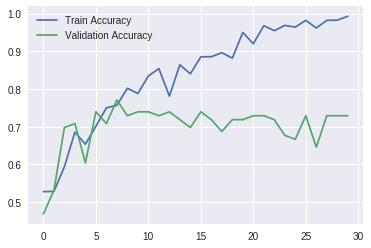

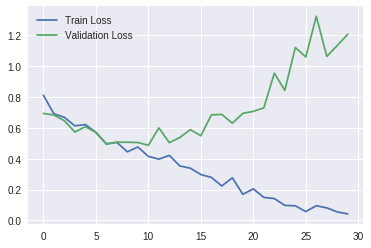

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()


### モデルの評価

In [0]:
evaluation = model.evaluate_generator(test_generator, steps=test_steps)
print(evaluation)

[0.9525312582651774, 0.75]


## ドロップアウトの導入

### モデルの修正

最初のモデルにDropout層を挿入してみましょう。

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))


### モデル構造の表示

In [0]:
model.summary()

### モデルのコンパイル

先ほどのモデルと同じ様にモデルをコンパイルします。

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

### モデルの訓練

先ほどと同じ30エポック、モデルの訓練を行います。

In [0]:
history = model.fit_generator(train_generator,
                             epochs=50,
                             steps_per_epoch=steps_per_epoch,
                             validation_data=validation_generator,
                             validation_steps=validation_steps)

### 学習経過のグラフ化

エポックごとの損失と正解率をグラフ化します。
先程のグラフとどの様に違うでしょうか？

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()


### モデルの保存

In [0]:
model.save('noodle_model_with_dropout.h5')

## パラメータ正則化の導入

### モデルの修正

最初のモデルにパラメータ正則化の導入をしてみましょう。

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), 
                              strides=(1, 1), 
                              activation='relu', 
                              input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), 
                              strides=(1, 1), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), 
                              strides=(1, 1), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, 
                             activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))


### モデル構造の表示

In [0]:
model.summary()

### モデルのコンパイル

先ほどのモデルと同じ様にモデルをコンパイルします。

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

### モデルの訓練

先ほどと同じ50エポック、モデルの訓練を行います。

In [0]:
history = model.fit_generator(train_generator,
                             epochs=50,
                             steps_per_epoch=steps_per_epoch,
                             validation_data=validation_generator,
                             validation_steps=validation_steps)

### 学習経過のグラフ化

エポックごとの損失と正解率をグラフ化します。
先程のグラフとどの様に違うでしょうか？

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()


### モデルの保存

In [0]:
model.save('noodle_model_with_ regularizer.h5')

## 保存済みモデルの読み込み

最も性能の良かったモデルを読み込みます。

In [0]:
model = keras.models.load_model('')

## モデルによる予測

下記のプログラムで、学習したモデルを使ってテスト用データの分類（予測）を行うことができます。  
予測結果がどのような形式なのかを確認してください。

In [0]:
predictions = model.predict_generator(test_generator, steps=test_steps)

print(predictions)

## モデルの予測結果を見てみる

次のプログラムを実行すると、テスト用データの１バッチ分についてモデルの予測値と正解を画像つきで確認できます。  
どのような結果になったかを確認してください。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

code_to_class = {0: 'ラーメン', 1: 'うどん'}

x, y = next(test_generator)
y_true = np.argmax(y, axis=1)
y_prob = model.predict_on_batch(x)
y_pred = np.argmax(y_prob, axis=1)

for i in range(len(x)):
    plt.imshow(x[i])
    plt.show()
    print('推定：', code_to_class[y_pred[i]])
    print('正解：', code_to_class[y_true[i]])